In [1]:
import numpy as np
import neurokit2 as nk
import matplotlib.pyplot as plt
from matplotlib.figure import figaspect
import os

In [2]:
ecg_signal = np.load("./ECG/clean_0.npy")
ecg_label = np.load("./ECG/clean_lable.npy")


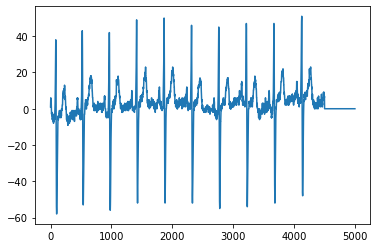

In [3]:
plt.plot(ecg_signal[1550])

In [4]:
'''ecg_signal = np.delete(ecg_signal,1541, axis = 0)
ecg_label = np.delete(ecg_label,1541, axis = 0)
ecg_signal = np.delete(ecg_signal,1550-1, axis = 0)
ecg_label = np.delete(ecg_label,1550-1, axis = 0)'''

'ecg_signal = np.delete(ecg_signal,1541, axis = 0)\necg_label = np.delete(ecg_label,1541, axis = 0)\necg_signal = np.delete(ecg_signal,1550-1, axis = 0)\necg_label = np.delete(ecg_label,1550-1, axis = 0)'

In [3]:
HTN = ecg_signal[:698,:] # 0-697为高血压样本
NHTN = ecg_signal[698:,:]# 698-1698 为正常样本
sample_rate = 500

In [4]:
def calculate_rr_interval(rpeaks):
  length = rpeaks.size
  if(length):
    RR_interval = np.zeros(length-1,int)
    for count in range(0,length-1,1):
      RR_interval[count] = rpeaks[count+1]-rpeaks[count]
    RR_interval.sort()
    print("RR_interval:",RR_interval)
    '''
    print("Mean = ",RR_interval.mean())
    print("Q1 = ",RR_interval[0])
    print("Q2 = ",RR_interval[int((length+1)/4)-1])
    print("Q3 = ",RR_interval[int((length+1)/2)-1])
    print("Q4 = ",RR_interval[int(3*(length+1)/4)-1])
    print("Q5 = ",RR_interval[-1])
  '''
    return True,RR_interval
  else:
    RR_interval = np.zeros(length,int)
    return False,RR_interval


In [5]:
HTN_RR_interval = []
count = 0
for ecg_i in HTN:
  print("count:",count)
  cleaned = nk.ecg_clean(ecg_i, sampling_rate=sample_rate)
  _, rpeaks = nk.ecg_peaks(ecg_i, correct_artifacts=True,method="kalidas2017")
  #fig = nk.events_plot(rpeaks["ECG_R_Peaks"], cleaned)
  #fig.savefig(fname=  "png/kalidas2017/"+str(count)+".png",)
  state,RR_interval_i = calculate_rr_interval(np.array(rpeaks['ECG_R_Peaks']))
  if(state):
    HTN_RR_interval.extend(RR_interval_i)
  count += 1

count: 0
RR_interval: [344 390 406 413 429 453 548 592 610]
count: 1
RR_interval: [511 520 531 535 536 539 540 541]
count: 2
RR_interval: [453 453 454 455 456 457 458 458 461]
count: 3
RR_interval: [396 396 396 398 398 400 401 401 401 403 405]
count: 4
RR_interval: [305 307 378 378 396 401 408 411 412 412 420]
count: 5
RR_interval: [353 353 353 355 356 359 360 361 362 365 365 424]
count: 6
RR_interval: [309 309 310 310 311 311 311 311 312 312 312 314 317 318]
count: 7
RR_interval: [433 436 438 438 439 440 441 442 445]
count: 8
RR_interval: [351 352 353 353 354 354 357 357 358 359 360 362]
count: 9
RR_interval: [327 332 333 341 347 391 406 408 432 443 446 460]
count: 10
RR_interval: [488 489 489 490 490 492 493 493 494]
count: 11
RR_interval: [455 457 464 467 467 472 479 498 504]
count: 12
RR_interval: [327 452 452 481 483 484 498 502 504]
count: 13
RR_interval: [496 501 504 507 509 510 513 514]
count: 14
RR_interval: [368 370 371 371 372 373 373 373 374 374 374 374]
count: 15
RR_interv

In [6]:
NHTN_RR_interval = []
count = 698
for ecg_i in NHTN:
  print("count:",count)
  cleaned = nk.ecg_clean(ecg_i, sampling_rate=sample_rate)
  _, rpeaks = nk.ecg_peaks(ecg_i, correct_artifacts=True,method="kalidas2017")
  #fig = nk.events_plot(rpeaks["ECG_R_Peaks"], cleaned)
  #fig.savefig(fname=  "png/kalidas2017/"+str(count)+".png",)
  state,RR_interval_i = calculate_rr_interval(np.array(rpeaks['ECG_R_Peaks']))
  if(state):
    NHTN_RR_interval.extend(RR_interval_i)
  count += 1

count: 698
RR_interval: [344 390 406 413 429 453 548 592 610]
count: 699
RR_interval: [511 520 531 535 536 539 540 541]
count: 700
RR_interval: [453 453 454 455 456 457 458 458 461]
count: 701
RR_interval: [317 322 329 353 357 366 367 380 381 382 400 439]
count: 702
RR_interval: [396 396 396 398 398 400 401 401 401 403 405]
count: 703
RR_interval: [305 307 378 378 396 401 408 411 412 412 420]
count: 704
RR_interval: [353 353 353 355 356 359 360 361 362 365 365 424]
count: 705
RR_interval: [309 309 310 310 311 311 311 311 312 312 312 314 317 318]
count: 706
RR_interval: [433 436 438 438 439 440 441 442 445]
count: 707
RR_interval: [351 352 353 353 354 354 357 357 358 359 360 362]
count: 708
RR_interval: [327 332 333 341 347 391 406 408 432 443 446 460]
count: 709
RR_interval: [488 489 489 490 490 492 493 493 494]
count: 710
RR_interval: [455 457 464 467 467 472 479 498 504]
count: 711
RR_interval: [327 452 452 481 483 484 498 502 504]
count: 712
RR_interval: [496 501 504 507 509 510 513

In [8]:
test = []
test.append(NHTN_RR_interval)
test.append(HTN_RR_interval)

In [23]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

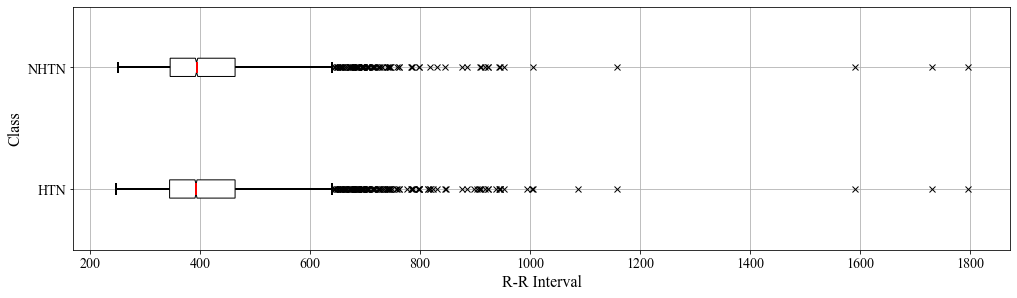

In [25]:
lightgreen_square = dict(markerfacecolor='lightgreen', marker='x')
ratio = 2/7 #设置图片比例 the ratio  = height / width).
w, h = figaspect(ratio)# return width,height 和ratio相反，非常神奇的脑回路
plt.rcParams['figure.figsize'] = (w, h) #按比例设置图片大小
fig = plt.figure(constrained_layout=True)
fig.set_constrained_layout_pads(hspace = 0)
gs = fig.add_gridspec(1, 1)#设置fig上要画多少行多少列的图片（即多张图画在一个fig上，如果只画一张图就（1，1）即可）
ax = fig.add_subplot(gs[0, 0]) #将fig的第一行第一列给坐标轴1 ax1
'''设置坐标标题'''	
ax.set_ylabel('Class', fontdict={'family' : 'Times New Roman', 'size'   : 16})
ax.set_xlabel('R-R Interval', fontdict={'family' : 'Times New Roman', 'size'   : 16})
ax.yaxis.grid(True)
ax.xaxis.grid(True)
ax.boxplot(test,labels=['HTN',"NHTN"],
          notch= True,  # notch shape
          vert= False,
          showmeans=False, 
          patch_artist = True,# fill with color
          showfliers = True,
          medianprops={"color": "red", "linewidth": 2},
          boxprops={"facecolor": "white", "edgecolor": "black","linewidth": 1},
          whiskerprops={"color": "black", "linewidth": 2},
          capprops={"color": "black", "linewidth": 2},
          flierprops = lightgreen_square)
ax
plt.yticks(fontproperties = 'Times New Roman', size = 14)
plt.xticks(fontproperties = 'Times New Roman', size = 14)
plt.savefig("./ECG/"+"RRInterval.png", dpi = 200) #按i.jpg保存图片

In [26]:
plt.style.use('ggplot')
plt.rcParams['font.sans-serif'] = 'Microsoft Yahei'
plt.rcParams["axes.unicode_minus"] = False
plt.figure(figsize=(25,25))

<Figure size 1800x1800 with 0 Axes>

<Figure size 1800x1800 with 0 Axes>